In [9]:
import numpy as np
import pandas as pd
import csv
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
from math import sqrt
from scipy.stats import norm
from scipy.stats import binom

In [12]:
#Confidence Interval
df=pd.read_csv("C:/Users/Riya_Asmi/Downloads/height-weight.csv")
alpha=0.05
x_bar=np.mean(df['weight'])
x=df['weight']
n=len(df)
s=x.std()
alpha=0.05
z=norm.ppf(alpha/2)
UB=x_bar-(z*s/sqrt(n))
LB=x_bar+(z*s/sqrt(n))
print('The confidence interval is','(',LB,UB,')')

The confidence interval is ( 126.93487383315647 127.22396848844184 )


In [11]:
#Confidence Interval
#we will use the z-score for a 95% confidence interval
#df = pd.read_csv('C:/Users/Riya_Asmi/Downloads/height-weight.csv')
df.head()

,height,weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [13]:
#Confidence Interval
pop_mean = np.mean(df.weight)
pop_mean

127.07942116079916

The number of times the population mean lies in the confidence interval is:  98
Proportion of times the population mean lies in the confidence interval is:  0.98


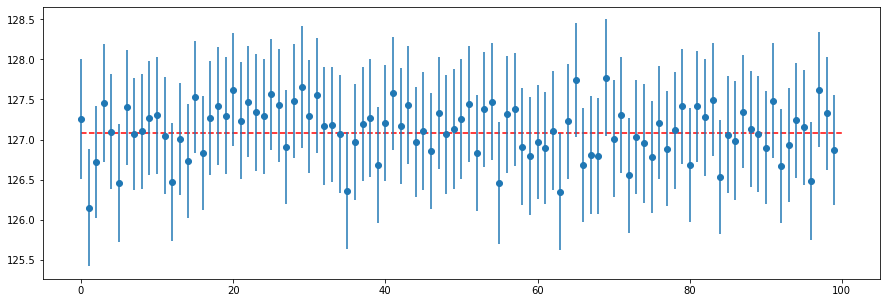

In [14]:
#Confidence Interval
def sampling(sample_size, no_of_samples):
    sample_means = []
    intervals = []
    count = 0
    for i in range(no_of_samples):
        sample = df.weight.sample(sample_size)
        sample_means.append(np.mean(sample))
        ci = norm.interval(0.95, np.mean(sample),np.std(sample, ddof = 1)/sqrt(sample_size))
        intervals.append(ci)
        if(pop_mean > ci[0] and pop_mean < ci[1]):
            count += 1
    print("The number of times the population mean lies in the confidence interval is: ", count)
    print("Proportion of times the population mean lies in the confidence interval is: ", count/no_of_samples)
    plt.figure(figsize = (15,5))
    plt.hlines(y=pop_mean, xmin=0, xmax=no_of_samples, color='r', linestyles='dashed')
    plt.errorbar(x=range(no_of_samples), y=sample_means, yerr=[(top-bot)/2 for top,bot in intervals], fmt='o')
    plt.show()
sampling(1000, 100)    

In [8]:
#Binomial Distribution
# X ~ Bin(100,0.5)
# X ~ N(50,sd=5)
#P(45 <= X >= 55)

print('Using X ~ Bin(100,0.5) , P(45 <= X >= 55)')
print(binom.cdf(55,100,0.5)-binom.cdf(44,100,0.5))

print('Using X ~ N(100*0.5,100*0.25) , P(45 <= X >= 55)')
print(norm.cdf(55,50,5)-norm.cdf(45,50,5))

print('Apllying Continuity correction')
print(norm.cdf(55.5,50,5)-norm.cdf(44.5,50,5))


Using X ~ Bin(100,0.5) , P(45 <= X >= 55)
0.7287469759261658
Using X ~ N(100*0.5,100*0.25) , P(45 <= X >= 55)
0.6826894921370859
Apllying Continuity correction
0.7286678781072347
